In [2]:
from  bs4 import BeautifulSoup
import pandas as pd
import requests
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
## ad-hoc clusterfuck of a parsing of the pfam species summary table 
## from http://pfam.xfam.org/proteome/browse
## (actually works)

pfam_index = requests.get('http://pfam.xfam.org/proteome/browse')

soup = BeautifulSoup(pfam_index.text, "html.parser")

tables = soup.find_all(name='table')

samples = tables[1]

rows = [row for row in samples.children]

rows = rows[3]

rows = list(filter(lambda x: x!='\n', rows))

print(len(rows))

5879


In [8]:
# parse rows into a dict
data = dict()
for tmp in rows : 
    
    species = tmp.a.text
    row = { 'pfam_id': tmp.a['href'].split('=')[-1],
           'kingdom' : tmp.find_all('td')[1].text,
           'proteome_size' : int(tmp.find_all('td')[2].text),
           'seq_cov': int(tmp.find_all('td')[3].text),
           'res_cov': int(tmp.find_all('td')[4].text)
          }
    data[species]=row
    
#finally parse into a dataframe
data = pd.DataFrame.from_dict(data, orient='index')
data.describe()
data.head(10)

,pfam_id,kingdom,proteome_size,seq_cov,res_cov
'Deinococcus soli' Cha et al. 2014,1309411,Bacteria,2935,79,60
'Echinacea purpurea' witches'-broom phytoplasma,1123738,Bacteria,433,75,58
Abalone herpesvirus (isolate Abalone/Australia/Victoria/2009) (AbHV),1241371,Viruses,112,16,8
Abiotrophia defectiva ATCC 49176,592010,Bacteria,1943,81,62
Acanthamoeba castellanii str. Neff,1257118,Eukaryota,14939,65,35
Acanthamoeba polyphaga mimivirus (APMV),212035,Viruses,909,42,27
Acanthisitta chloris (rifleman),57068,Eukaryota,9650,84,50
Acaryochloris marina (strain MBIC 11017),329726,Bacteria,8172,61,51
Accumulibacter phosphatis (strain UW-1),522306,Bacteria,4438,83,59
Acetivibrio ethanolgignens,290052,Bacteria,3375,75,56


80.0

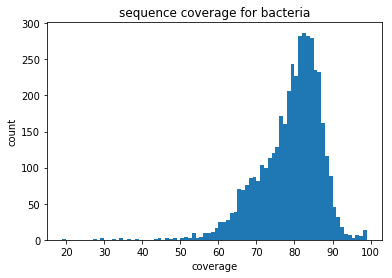

In [197]:
#distribution of sequence coverage for bacteria
isBacteria = data['kingdom'] == 'Bacteria'
scov = data[isBacteria]['seq_cov']

hist(scov, bins = range(min(scov), max(scov)));
title('sequence coverage for bacteria')
xlabel('coverage')
ylabel('count')

median(data[isBacteria]['seq_cov'])

In [200]:
threshold = 80

covered = data['seq_cov'] >=threshold
sum(covered)

2729

4391


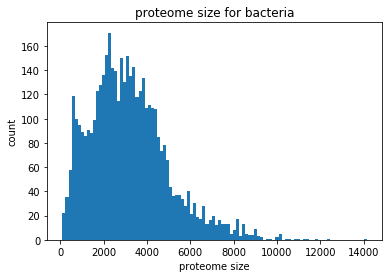

In [201]:
hist(data[isBacteria]['proteome_size'], bins = 100);
print (len(data[isBacteria]))
title('proteome size for bacteria')
xlabel('proteome size')
ylabel('count')

In [164]:
b[ b[ 'proteome_size']< 1000 ]

,pfam_id,kingdom,proteome_size,seq_cov,res_cov
'Echinacea purpurea' witches'-broom phytoplasma,1123738,Bacteria,433,75,58
Actinobacteria bacterium BACL2 MAG-120920-bin34,1655602,Bacteria,999,88,69
Actinobacteria bacterium BACL4 MAG-120813-bin39,1655578,Bacteria,499,92,73
Amycolatopsis halophila YIM 93223,592678,Bacteria,356,79,58
Anaerolineae bacterium 49_20,1641376,Bacteria,966,83,62
Anaplasma marginale (strain Florida),320483,Bacteria,938,80,55
Arsenophonus symbiont of Lipoptena fortisetosa,634113,Bacteria,625,100,78
Atribacteria bacterium 34_128,1635291,Bacteria,834,89,72
Atribacteria bacterium 34_868,1641392,Bacteria,237,85,70
Azobacteroides pseudotrichonymphae genomovar. CFP2,511995,Bacteria,847,86,68


(array([  2.,   6.,   6.,  25.,  15.,  22.,  19.,   9.,   9.,   5.,   2.,
          8.,  15.]),
 array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 13 Patch objects>)

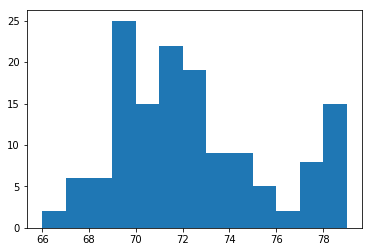

In [150]:
hist(b['res_cov'])

In [202]:
large_proteome = data['proteome_size']>1000

accessions = data[isBacteria & covered & large_proteome]['pfam_id']
tmp = accessions.to_dict()
nums = {tmp[key]:key for key in tmp}
nums
import pickle
f=open('list.pkl', 'wb')
pickle.dump(nums, f)